In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns

import statsmodels.formula.api as smf

pitching = pd.read_csv('Pitching.csv')
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [35]:
pitching.shape

(48399, 30)

In [36]:
career_pitching = pitching.groupby('playerID')[['SO', 'BB', 'IPouts', 'yearID']].agg({'SO': 'sum',
                                                                                      'BB': 'sum',
                                                                                      'IPouts': 'sum', 
                                                                                      'yearID': lambda x: x.median()})
career_pitching = career_pitching.reset_index()
career_pitching.columns = ['playerID', 'tot_SO', 'tot_BB', 'tot_IPouts', 'mid_year']
career_pitching

,playerID,tot_SO,tot_BB,tot_IPouts,mid_year
0,aardsda01,340,183,1011,2009.0
1,aasedo01,641,457,3328,1984.0
2,abadfe01,280,116,992,2014.5
3,abbeybe01,161,192,1704,1894.5
4,abbeych01,0,0,6,1896.0
...,...,...,...,...,...
9988,zuberbi01,383,468,2358,1942.5
9989,zuberty01,30,20,66,2020.0
9990,zumayjo01,210,114,629,2008.0
9991,zuverge01,223,203,1927,1955.0


In [37]:
pitching = pd.merge(pitching, career_pitching, on = 'playerID')
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BFP,GF,R,SH,SF,GIDP,tot_SO,tot_BB,tot_IPouts,mid_year
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,146.0,0,42,NaN,NaN,NaN,10,22,729,1874.0
1,bechtge01,1873,1,PH2,NaN,0,2,3,2,1,...,87.0,1,24,NaN,NaN,NaN,10,22,729,1874.0
2,bechtge01,1874,1,PH2,NaN,1,3,6,4,4,...,193.0,1,42,NaN,NaN,NaN,10,22,729,1874.0
3,bechtge01,1875,1,PH3,NaN,2,12,14,14,14,...,621.0,0,138,NaN,NaN,NaN,10,22,729,1874.0
4,bechtge01,1875,2,PH1,NaN,3,1,4,4,4,...,150.0,0,19,NaN,NaN,NaN,10,22,729,1874.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48394,woodfja01,2020,1,SLN,NL,1,0,12,1,0,...,85.0,4,13,0.0,1.0,3.0,16,5,63,2020.0
48395,yajurmi01,2020,1,NYA,AL,0,0,3,0,0,...,29.0,3,1,0.0,0.0,0.0,8,5,21,2020.0
48396,yamagsh01,2020,1,TOR,AL,2,4,17,0,0,...,120.0,7,25,0.0,2.0,3.0,26,17,77,2020.0
48397,zimmebr02,2020,1,BAL,AL,0,0,2,1,0,...,31.0,1,6,0.0,0.0,1.0,7,2,21,2020.0


In [38]:
pitching = pitching[pitching['tot_IPouts'] > 10000].reset_index(drop = True)
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BFP,GF,R,SH,SF,GIDP,tot_SO,tot_BB,tot_IPouts,mid_year
0,mathebo01,1871,1,FW1,NaN,6,11,19,19,19,...,876.0,0,243,NaN,NaN,NaN,1528,532,14868,1880.0
1,mathebo01,1872,1,BL1,NaN,25,18,49,47,39,...,1922.0,4,356,NaN,NaN,NaN,1528,532,14868,1880.0
2,mathebo01,1873,1,NY2,NaN,29,23,52,52,47,...,2008.0,0,348,NaN,NaN,NaN,1528,532,14868,1880.0
3,mathebo01,1874,1,NY2,NaN,42,22,65,65,62,...,2543.0,0,371,NaN,NaN,NaN,1528,532,14868,1880.0
4,mathebo01,1875,1,NY2,NaN,29,38,70,70,69,...,2759.0,0,421,NaN,NaN,NaN,1528,532,14868,1880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,sabatcc01,2015,1,NYA,AL,6,10,29,29,1,...,726.0,0,92,5.0,6.0,20.0,3093,1099,10732,2009.5
1747,sabatcc01,2016,1,NYA,AL,9,12,30,30,0,...,768.0,0,83,5.0,2.0,21.0,3093,1099,10732,2009.5
1748,sabatcc01,2017,1,NYA,AL,14,5,27,27,0,...,623.0,0,64,2.0,0.0,10.0,3093,1099,10732,2009.5
1749,sabatcc01,2018,1,NYA,AL,9,7,29,29,0,...,665.0,0,72,0.0,3.0,9.0,3093,1099,10732,2009.5


In [39]:
pitching['ratio_SO_BB'] = pitching['tot_SO'] / pitching['tot_BB']
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,GF,R,SH,SF,GIDP,tot_SO,tot_BB,tot_IPouts,mid_year,ratio_SO_BB
0,mathebo01,1871,1,FW1,NaN,6,11,19,19,19,...,0,243,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180
1,mathebo01,1872,1,BL1,NaN,25,18,49,47,39,...,4,356,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180
2,mathebo01,1873,1,NY2,NaN,29,23,52,52,47,...,0,348,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180
3,mathebo01,1874,1,NY2,NaN,42,22,65,65,62,...,0,371,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180
4,mathebo01,1875,1,NY2,NaN,29,38,70,70,69,...,0,421,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,sabatcc01,2015,1,NYA,AL,6,10,29,29,1,...,0,92,5.0,6.0,20.0,3093,1099,10732,2009.5,2.814377
1747,sabatcc01,2016,1,NYA,AL,9,12,30,30,0,...,0,83,5.0,2.0,21.0,3093,1099,10732,2009.5,2.814377
1748,sabatcc01,2017,1,NYA,AL,14,5,27,27,0,...,0,64,2.0,0.0,10.0,3093,1099,10732,2009.5,2.814377
1749,sabatcc01,2018,1,NYA,AL,9,7,29,29,0,...,0,72,0.0,3.0,9.0,3093,1099,10732,2009.5,2.814377


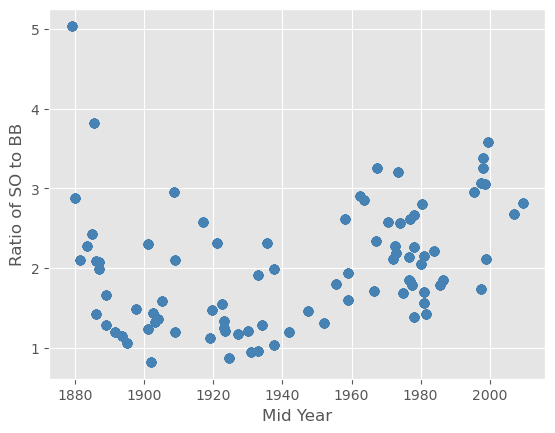

In [41]:
plt.plot('mid_year', 'ratio_SO_BB', 'o', data = pitching, color = 'steelblue')
plt.xlabel('Mid Year')
plt.ylabel('Ratio of SO to BB');

In [44]:
quad_md = smf.ols(formula = 'ratio_SO_BB ~ mid_year + I(mid_year**2) + I(mid_year**3) + I(mid_year**4)', data = pitching).fit()

quad_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ratio_SO_BB   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     397.6
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          4.63e-143
Time:                        08:09:27   Log-Likelihood:                -1596.2
No. Observations:                1751   AIC:                             3198.
Df Residuals:                    1748   BIC:                             3215.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.137e-10   1.97e-11     20.968      0.000    3.75e-10    4.52e-10
mid_year           4.02e-07   1.92e-08     20.968      0.000    3.64e-07     4.4e-07
I(mid_year ** 2)     0.0003   1.24e-05     20.968      0.000       0.000       0.000
I(mid_year ** 3) -2.688e-07   1.28e-08    -21.037      0.000   -2.94e-07   -2.44e-07
I(mid_year ** 4)  6.948e-11   3.29e-12     21.147      0.000     6.3e-11    7.59e-11
==============================================================================
Omnibus:                      309.526   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.413
Skew:                           1.044   Prob(JB):                    1.90e-135
Kurtosis:                       5.036   Cond. No.                     1.64e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
pitching['ratio_SO_BB_pred'] = quad_md.predict(pitching['mid_year'])
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,R,SH,SF,GIDP,tot_SO,tot_BB,tot_IPouts,mid_year,ratio_SO_BB,ratio_SO_BB_pred
0,mathebo01,1871,1,FW1,NaN,6,11,19,19,19,...,243,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180,2.192054
1,mathebo01,1872,1,BL1,NaN,25,18,49,47,39,...,356,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180,2.192054
2,mathebo01,1873,1,NY2,NaN,29,23,52,52,47,...,348,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180,2.192054
3,mathebo01,1874,1,NY2,NaN,42,22,65,65,62,...,371,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180,2.192054
4,mathebo01,1875,1,NY2,NaN,29,38,70,70,69,...,421,NaN,NaN,NaN,1528,532,14868,1880.0,2.872180,2.192054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,sabatcc01,2015,1,NYA,AL,6,10,29,29,1,...,92,5.0,6.0,20.0,3093,1099,10732,2009.5,2.814377,3.243676
1747,sabatcc01,2016,1,NYA,AL,9,12,30,30,0,...,83,5.0,2.0,21.0,3093,1099,10732,2009.5,2.814377,3.243676
1748,sabatcc01,2017,1,NYA,AL,14,5,27,27,0,...,64,2.0,0.0,10.0,3093,1099,10732,2009.5,2.814377,3.243676
1749,sabatcc01,2018,1,NYA,AL,9,7,29,29,0,...,72,0.0,3.0,9.0,3093,1099,10732,2009.5,2.814377,3.243676


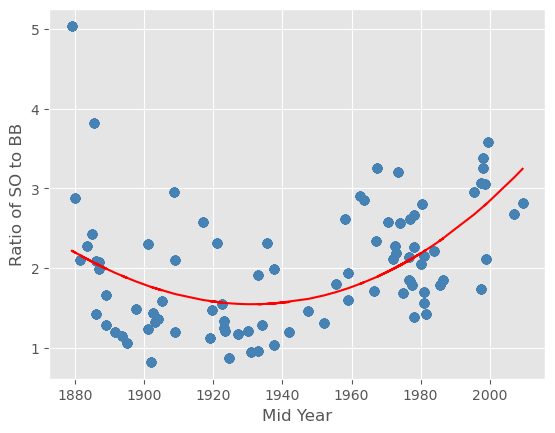

In [47]:
plt.plot('mid_year', 'ratio_SO_BB', 'o', data = pitching, color = 'steelblue')
plt.plot('mid_year', 'ratio_SO_BB_pred', '-', data = pitching, color = 'red')
plt.xlabel('Mid Year')
plt.ylabel('Ratio of SO to BB');